In [25]:
import numpy as np

import wf_psf as wf

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick
import seaborn as sns



In [26]:
def define_plot_style():
    # Define plot paramters
    # Use seaborn style
    sns.set()
    
    plot_style = {
        'figure.figsize': (12,8),
        'figure.dpi': 200,
        'figure.autolayout':True,
        'lines.linewidth': 2,
        'lines.linestyle': '-',
        'lines.marker': 'o',
        'lines.markersize': 10,
        'legend.fontsize': 20,
        'legend.loc': 'best',
        'axes.titlesize': 24,
        'font.size': 22
    }
    mpl.rcParams.update(plot_style)

saving_folder ='../figures/'

define_plot_style()
sns.set(font_scale=1.5)



In [27]:
metrics_file = '../wf-outputs/metrics/wfe_study_resx3_bis/metrics-poly_wfe_study_resx3_%s_bis_%s.npy'


# wf.script_utils.extract_shape_pix_results ->
#     model_polyc_shpix_rmse = res[0]
#     model_polyc_shpix_std_rmse = res[1]
#     model_polyc_shpix_rel_rmse = res[2]
#     model_polyc_shpix_std_rel_rmse = res[3]


In [28]:
# Extract full datasets
n_realisations = 15

dataset_list = [
    ('064',),
    ('128',),
    ('256',),
    ('256_benchmark',),
]

metrics_dict_list = []
pix_metrics_dict_list = []
opd_metrics_dict_list = []
for idx in range(1, n_realisations+1):   
    metrics_dict_list_ = wf.script_utils.extract_shape_pix_results(
        [np.load(metrics_file % (dataset+(str(idx),)), allow_pickle=True)[()] for dataset in dataset_list]
    )
    pix_metrics_dict_list_ = wf.script_utils.extract_poly_results(
        [np.load(metrics_file % (dataset+(str(idx),)), allow_pickle=True)[()] for dataset in dataset_list]
    )
    opd_metrics_dict_list_ = wf.script_utils.extract_opd_results(
        [np.load(metrics_file % (dataset+(str(idx),)), allow_pickle=True)[()] for dataset in dataset_list]
    )
    metrics_dict_list.append(metrics_dict_list_)
    pix_metrics_dict_list.append(pix_metrics_dict_list_)
    opd_metrics_dict_list.append(opd_metrics_dict_list_)
    
metrics_dict_list_np = np.array(metrics_dict_list)
pix_metrics_dict_list_np = np.array(pix_metrics_dict_list)
opd_metrics_dict_list_np = np.array(opd_metrics_dict_list)



In [29]:

metrics_mean = np.mean(metrics_dict_list_np,axis=0)
pix_metrics_mean = np.mean(pix_metrics_dict_list_np,axis=0)
opd_metrics_mean = np.mean(opd_metrics_dict_list_np,axis=0)

metrics_median = np.median(metrics_dict_list_np,axis=0)
pix_metrics_median = np.median(pix_metrics_dict_list_np,axis=0)
opd_metrics_median = np.median(opd_metrics_dict_list_np,axis=0)

metrics_std = np.std(metrics_dict_list_np,axis=0)
pix_metrics_std = np.std(pix_metrics_dict_list_np,axis=0)
opd_metrics_std = np.std(opd_metrics_dict_list_np,axis=0)

metrics_best = np.min(metrics_dict_list_np,axis=0)
pix_metrics_best = np.min(pix_metrics_dict_list_np,axis=0)
opd_metrics_best = np.min(opd_metrics_dict_list_np,axis=0)



In [30]:

SR_data = np.load(saving_folder+'result_dict_total_reps.npy',allow_pickle=True)[()]

SR_data


{'model_064_rel_rmse': array([6.43958849, 4.5148942 , 7.03129339, 5.18500449, 5.66809588,
        5.71443545, 5.65758543, 6.46967079, 6.17768274, 4.38893771,
        5.64442946, 5.58807755, 6.81902082, 4.94931877, 6.60063669]),
 'model_064_std_rel_rmse': array([2.46884952, 2.04078886, 4.19700985, 1.8659101 , 1.69467889,
        1.94065863, 1.78249998, 3.03667582, 2.30599106, 1.95426579,
        2.37413141, 2.36298788, 2.91554769, 2.1565339 , 2.8102065 ]),
 'model_128_rel_rmse': array([5.42097046, 2.11293908, 2.10626005, 3.45872813, 3.28045238,
        3.67064308, 3.07061397, 4.19846729, 4.5723978 , 2.76683228,
        4.72089701, 5.16129057, 5.65956429, 5.4985767 , 3.60274507]),
 'model_128_std_rel_rmse': array([4.0749473 , 1.29302873, 1.20299272, 1.18403576, 1.43188567,
        1.10953506, 1.49602465, 1.9786871 , 1.61180811, 1.34480574,
        2.28292611, 1.90541314, 4.05664667, 1.89366435, 1.53948893]),
 'model_256_rel_rmse': array([4.18412105, 6.33608123, 3.2794323 , 4.67587151, 4.

In [31]:
print(pix_metrics_mean[2,:])
print(pix_metrics_median[2,:])


[3.28013755 1.90948202 1.30729736 1.23477352]
[3.25311832 1.90369505 1.29285213 1.23608587]


In [32]:
print(pix_metrics_dict_list_np[:,2,3])

print(metrics_dict_list_np[:,2,3])


print(metrics_mean[2,:])


[1.02460459 1.20908581 1.30998492 1.16795395 1.06931087 1.2816662
 1.28698321 1.2448146  1.33919548 1.22944284 1.23608587 1.20556168
 1.18666859 1.38700912 1.343235  ]
[2.55581141 3.95596512 5.52377664 3.56049053 2.70311013 5.40288687
 4.41982374 3.42967808 4.58870903 6.40113279 3.91918421 4.07850854
 4.43004332 5.53563796 6.40337318]
[5.66372653 4.04395267 4.48659122 4.4605421 ]


In [46]:

SR_metrics = np.array([
    SR_data['model_064_rel_rmse'],
    SR_data['model_128_rel_rmse'],
    SR_data['model_256_rel_rmse'],
])


SR_metrics_mean = np.mean(SR_metrics, axis=1)
SR_metrics_median = np.median(SR_metrics, axis=1)
SR_metrics_std = np.std(SR_metrics, axis=1)
SR_metrics_best = np.min(SR_metrics, axis=1)




In [47]:
SR_metrics_median

array([5.66809588, 3.67064308, 4.62833983])

In [48]:
SR_metrics_mean

array([5.78991146, 3.95342521, 4.52955835])

In [40]:

# Log files path
log_files_path = '../wf-outputs/log-files/wfe_study_resx3_bis/poly_wfe_study_resx3_%s_bis_%s_output.log'



In [41]:

times_list = []
# Load computing times
for idx in range(1, n_realisations+1):
    
    times_list.append([
        float(open(log_files_path % (dataset+(str(idx),)) ).readlines()[-3][20:-1])
        for dataset in dataset_list
    ])

times_list_np = np.array(times_list)


In [42]:
times_list_np.shape

(15, 4)

In [43]:
# Convert from sec to hours
times_mean = np.mean(times_list_np, axis=0) / 3600.
times_median = np.median(times_list_np, axis=0) / 3600.
times_std = np.std(times_list_np, axis=0) / 3600.
times_best = np.min(times_list_np, axis=0) / 3600.


In [44]:
print(metrics_mean.shape)
print(metrics_median.shape)
print(metrics_std.shape)
print(metrics_best.shape)

print(pix_metrics_mean.shape)
print(pix_metrics_median.shape)
print(pix_metrics_std.shape)
print(pix_metrics_best.shape)

print(opd_metrics_mean.shape)
print(opd_metrics_median.shape)
print(opd_metrics_std.shape)
print(opd_metrics_best.shape)

# Dimensions (a,b)
# a -> (rmse, std_rmse , rel_rmse , std_rel_rmse)
# b -> datasets


(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)


In [53]:
print('Relative pixel RMSE')
print('Mean: \t', pix_metrics_mean[2,:])
print('Median: ', pix_metrics_median[2,:])
print('Std dev:', pix_metrics_std[2,:])
print('Best: \t', pix_metrics_best[2,:])
print(''),print('')
print('Relative SR pixel RMSE: benchmark 256')
print('Mean: \t', metrics_mean[2,-1])
print('Median: ', metrics_median[2,-1])
print('Std dev:', metrics_std[2,-1])
print('Best: \t', metrics_best[2,-1])
print(''),print('')
print('Relative SR pixel RMSE: 64, 128, 256')
print('Mean: \t', SR_metrics_mean)
print('Median: ', SR_metrics_median)
print('Std dev:', SR_metrics_std)
print('Best: \t', SR_metrics_best)
print(''),print('')
print('Relative WFE RMSE')
print('Mean: \t', opd_metrics_mean[2,:])
print('Median: ', opd_metrics_median[2,:])
print('Std dev:', opd_metrics_std[2,:])
print('Best: \t', opd_metrics_best[2,:])
print(''),print('')
print('Computing times [hours]')
print('Mean: \t', times_mean)
print('Median: ', times_median)
print('Std dev:', times_std)
print('Best: \t', times_best)

print(''),print('')
print('Datasets: ', dataset_list)


Relative pixel RMSE
Mean: 	 [3.28013755 1.90948202 1.30729736 1.23477352]
Median:  [3.25311832 1.90369505 1.29285213 1.23608587]
Std dev: [0.10135006 0.08929658 0.06950874 0.09535792]
Best: 	 [3.14943418 1.68718789 1.17711425 1.02460459]


Relative SR pixel RMSE: benchmark 256
Mean: 	 4.460542102654775
Median:  4.419823735952377
Std dev: 1.1551844803063445
Best: 	 2.5558114051818848


Relative SR pixel RMSE: 64, 128, 256
Mean: 	 [5.78991146 3.95342521 4.52955835]
Median:  [5.66809588 3.67064308 4.62833983]
Std dev: [0.77686305 1.14979835 0.84516414]
Best: 	 [4.38893771 2.10626005 3.2794323 ]


Relative WFE RMSE
Mean: 	 [172.13694996 179.27313128 201.46870137 198.81211151]
Median:  [167.89284567 179.76140703 203.0898941  204.22597252]
Std dev: [17.33295798 18.70761136  9.71821591 14.7616831 ]
Best: 	 [143.64208812 146.15782631 183.84024362 171.0286742 ]


Computing times [hours]
Mean: 	 [ 6.40562627 10.53176033 10.5169001  12.00245892]
Median:  [ 6.17215533 11.59737628 10.42245503 12.30

In [54]:
times_mean.shape


(4,)

# Plots

In [55]:
wfe_res = np.array([64, 128, 256])


# Relative SR (res x3) pixel RMSE & Computing time vs WFE res

In [56]:
resx3_error_bound = 5.7081e-01


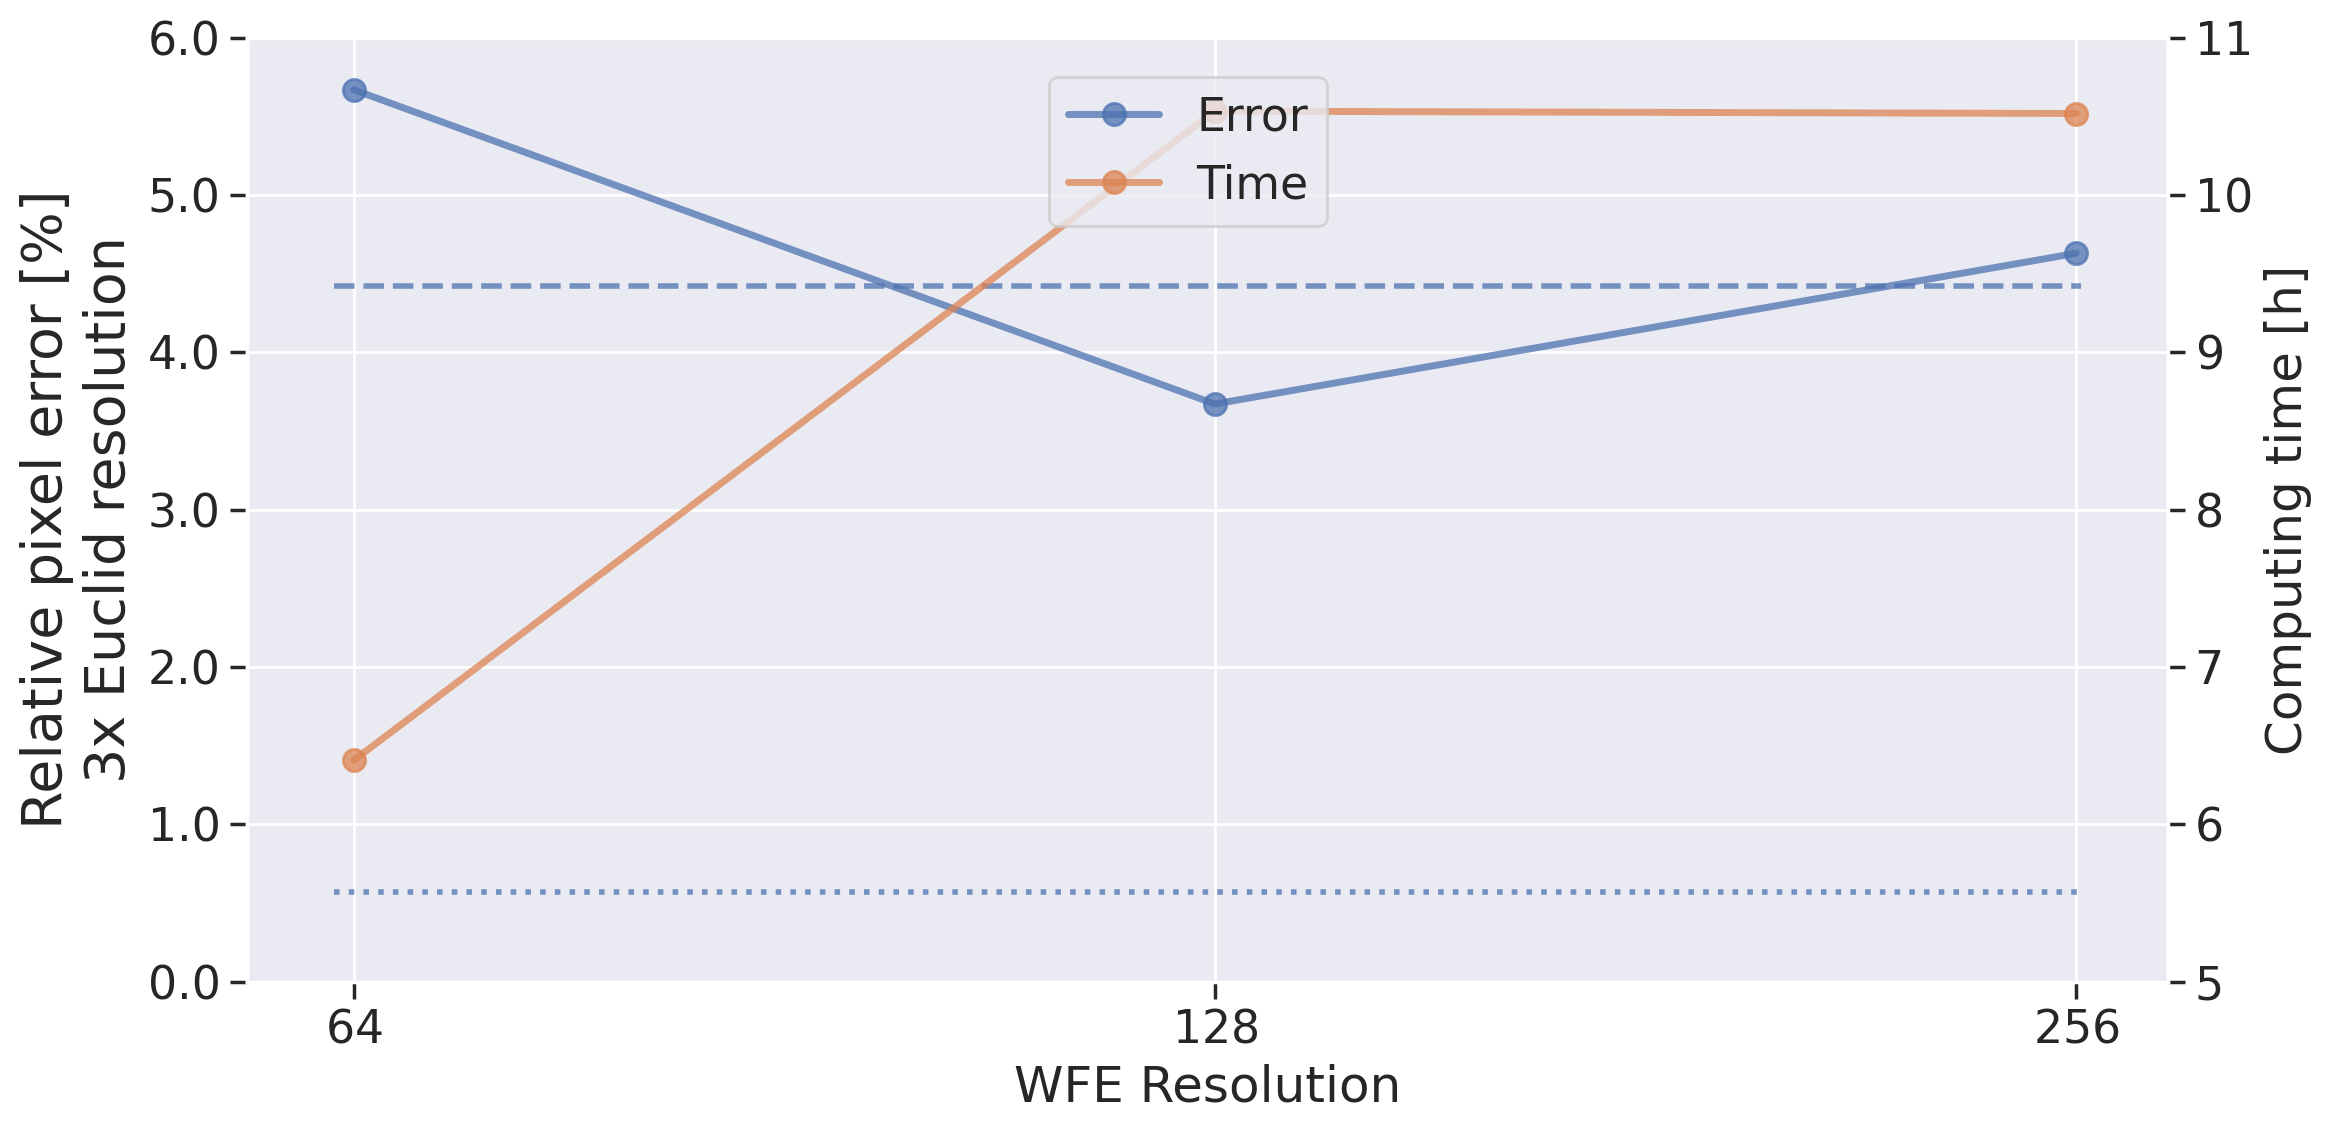

In [57]:

# Define style
define_plot_style()
sns.set(font_scale=1.5)

kwargs = dict(linewidth=2.5, alpha=0.75, markersize=8)

fig, ax1 = plt.subplots(figsize=(12, 6),facecolor='white')

# fig.suptitle('PSF relative errors @ 3x Euclid resolution - Training time')
    

ax1.set_xlabel('WFE Resolution')
ax1.set_ylabel('Relative pixel error [%]\n3x Euclid resolution', fontsize = 20) 

# ax1.plot(wfe_res, metrics_mean[2,:-1], color=sns.color_palette()[0], label='Error', **kwargs)
# ax1.hlines(metrics_mean[2,-1], xmin=63, xmax=257, colors=sns.color_palette()[0], linestyles='dashed', linewidth=2, label='', alpha=0.75)

ax1.plot(wfe_res, SR_metrics_median, color=sns.color_palette()[0], label='Error', **kwargs)
ax1.hlines(metrics_median[2,-1], xmin=63, xmax=257, colors=sns.color_palette()[0], linestyles='dashed', linewidth=2, label='', alpha=0.75)
ax1.hlines(resx3_error_bound, xmin=63, xmax=257, colors=sns.color_palette()[0], linestyles='dotted', linewidth=2, label='', alpha=0.75)


ax1.tick_params(axis='y')
ax1.set_ylim((0,6))
ax1.yaxis.set_major_locator(mpl.ticker.LinearLocator(7))
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))

ax1.set_xscale('log', base=2) # Important to leave the base=2
plt.xticks([64,128,256])
ax1.get_xaxis().set_major_formatter(mtick.ScalarFormatter())


ax1.get_xaxis().set_tick_params(which='minor', size=0)
ax1.get_xaxis().set_tick_params(which='minor', width=0) 

ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.xaxis.tick_bottom()
ax1.xaxis.major.formatter._useMathText = True


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Computing time [h]')  # we already handled the x-label with ax1
ax2.plot(wfe_res, times_mean[:-1], color=sns.color_palette()[1], label='Time', **kwargs)
ax2.tick_params(axis='y') 
ax2.grid(None)
ax2.set_ylim((5,11))
ax2.yaxis.set_major_locator(mpl.ticker.LinearLocator(7))


fig.tight_layout()  # otherwise the right y-label is slightly clipped

fig.legend(loc=(0.45,0.8))

# plt.savefig('../figures/wfe-study_resx3_error-and-time_vs_wfe-res_mean.pdf')
# plt.savefig('../figures/wfe-study_resx3_error-and-time_vs_wfe-res_median.pdf')

plt.show()




# Relative (res x1) pixel RMSE & Computing time vs WFE res

In [27]:

resx1_error_bound = 4.6788e-01


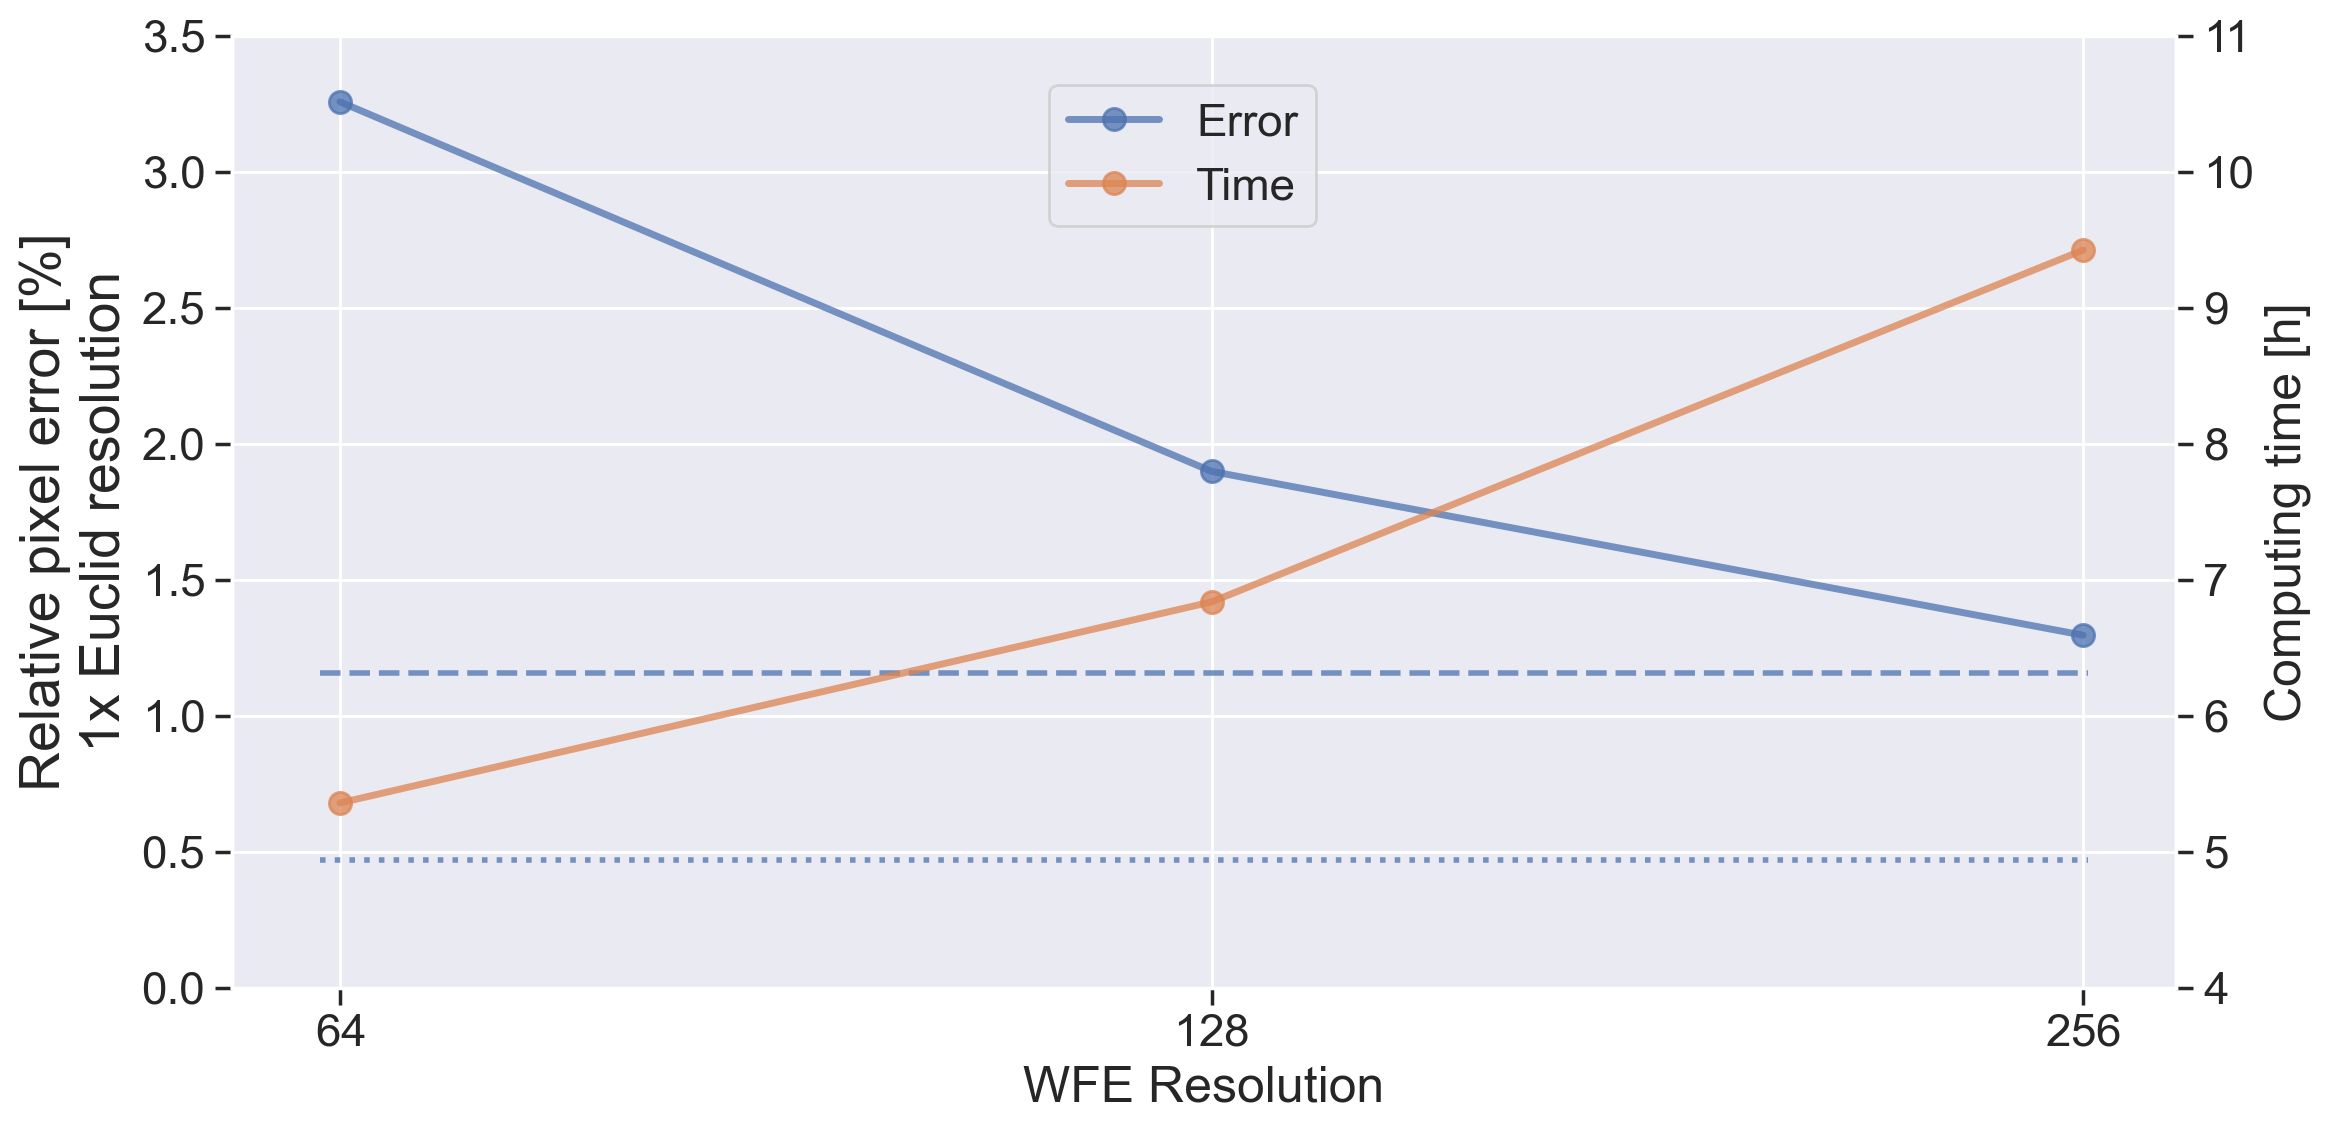

In [31]:
# Define style
define_plot_style()
sns.set(font_scale=1.5)

kwargs = dict(linewidth=2.5, alpha=0.75, markersize=8)

fig, ax1 = plt.subplots(figsize=(12, 6),facecolor='white')

# fig.suptitle('PSF relative errors @ 3x Euclid resolution - Training time')
    

ax1.set_xlabel('WFE Resolution')
ax1.set_ylabel('Relative pixel error [%]\n1x Euclid resolution', fontsize = 20) 

ax1.plot(wfe_res, pix_metrics_mean[2,:-1], color=sns.color_palette()[0], label='Error', **kwargs)
ax1.hlines(pix_metrics_mean[2,-1], xmin=63, xmax=257, colors=sns.color_palette()[0], linestyles='dashed', linewidth=2, label='', alpha=0.75)
ax1.hlines(resx1_error_bound, xmin=63, xmax=257, colors=sns.color_palette()[0], linestyles='dotted', linewidth=2, label='', alpha=0.75)



# ax1.plot(wfe_res, pix_metrics_median[2,:-1], color=sns.color_palette()[0], label='Error', **kwargs)
# ax1.hlines(pix_metrics_median[2,-1], xmin=63, xmax=257, colors=sns.color_palette()[0], linestyles='dashed', linewidth=2, label='', alpha=0.75)

ax1.tick_params(axis='y')
ax1.set_ylim((0,3.5))
ax1.yaxis.set_major_locator(mpl.ticker.LinearLocator(8))
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))

ax1.set_xscale('log', base=2) # Important to leave the base=2
plt.xticks([64,128,256])
ax1.get_xaxis().set_major_formatter(mtick.ScalarFormatter())


ax1.get_xaxis().set_tick_params(which='minor', size=0)
ax1.get_xaxis().set_tick_params(which='minor', width=0) 

ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.xaxis.tick_bottom()
ax1.xaxis.major.formatter._useMathText = True


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Computing time [h]')  # we already handled the x-label with ax1
ax2.plot(wfe_res, times_mean[:-1], color=sns.color_palette()[1], label='Time', **kwargs)
ax2.tick_params(axis='y') 
ax2.grid(None)
ax2.set_ylim((4,11))
ax2.yaxis.set_major_locator(mpl.ticker.LinearLocator(8))


fig.tight_layout()  # otherwise the right y-label is slightly clipped

fig.legend(loc=(0.45,0.8))

# plt.savefig('../figures/wfe-study_resx1_error-and-time_vs_wfe-res_mean.pdf')
# plt.savefig('../figures/wfe-study_resx1_error-and-time_vs_wfe-res_median.pdf')

plt.show()


# Compute error between datasets of different WFE res

In [5]:

test_256_path = '../../WFE_sampling_test/multires_dataset/4096/test_Euclid_res_id_004_wfeRes_256.npy'
test_4096_path = '../../WFE_sampling_test/multires_dataset/4096/test_Euclid_res_id_004_wfeRes_4096.npy'

# test_256_path = '/Users/tliaudat/Documents/PhD/codes/WF_PSF/github/wf-SEDs/WFE_sampling_test/multires_dataset/4096/test_Euclid_res_id_004_wfeRes_256.npy'
# test_4096_path = '/Users/tliaudat/Documents/PhD/codes/WF_PSF/github/wf-SEDs/WFE_sampling_test/multires_dataset/4096/test_Euclid_res_id_004_wfeRes_4096.npy'

test_256 = np.load(test_256_path, allow_pickle=True)[()]
test_4096 = np.load(test_4096_path, allow_pickle=True)[()]


In [6]:
test_4096.keys()

dict_keys(['stars', 'positions', 'SEDs', 'zernike_coef', 'C_poly', 'parameters'])

In [7]:

test_4096['SEDs'].shape


(400, 350, 2)

/tmp/ipykernel_2339346/2492737282.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()
/tmp/ipykernel_2339346/2492737282.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()
/tmp/ipykernel_2339346/2492737282.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


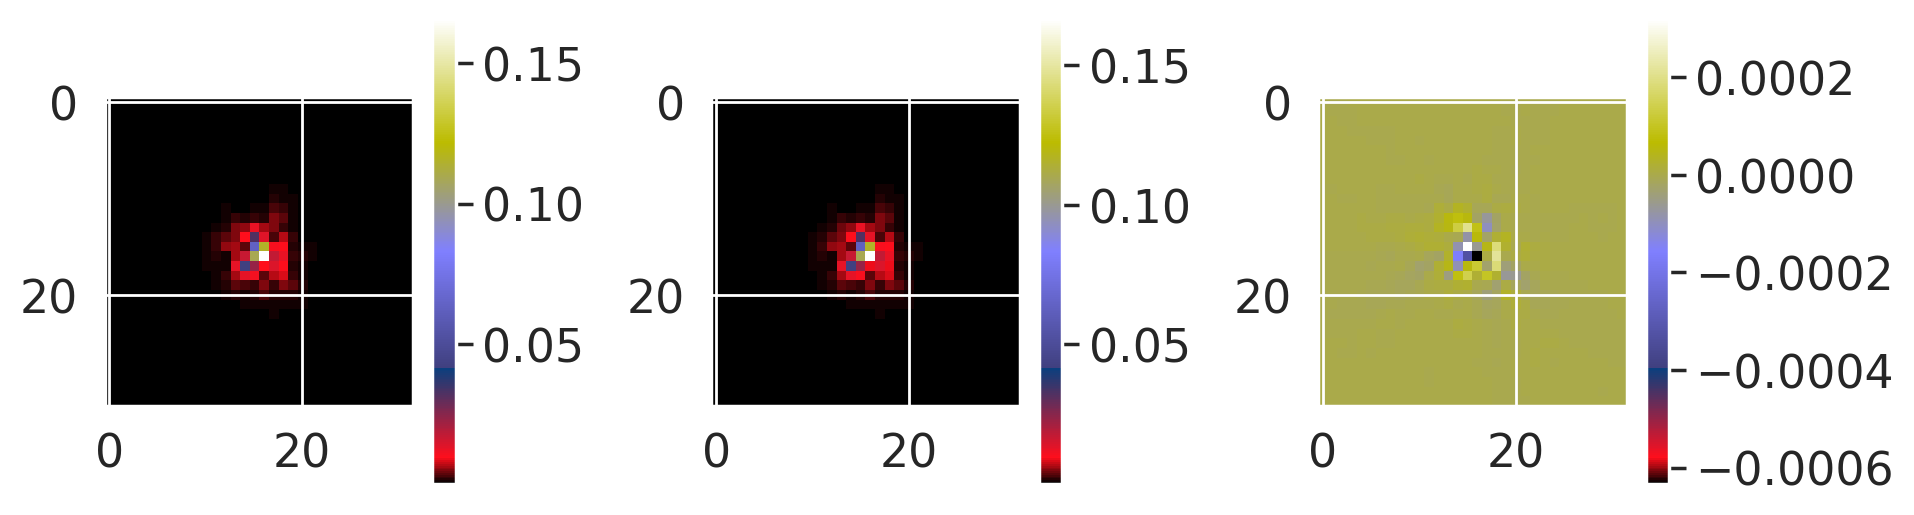

In [7]:
it = 2

plt.figure(figsize=(10,3))

plt.subplot(131)
plt.imshow(test_256['stars'][it,:,:], cmap='gist_stern')
plt.colorbar()

plt.subplot(132)
plt.imshow(test_4096['stars'][it,:,:], cmap='gist_stern')
plt.colorbar()

plt.subplot(133)
plt.imshow(test_256['stars'][it,:,:] - test_4096['stars'][it,:,:], cmap='gist_stern')
plt.colorbar()
plt.show()


## Pixel error x1 res

In [21]:

def compute_stats(GT_preds, preds):
    # Calculate residuals
    residuals = np.sqrt(np.mean((GT_preds - preds)**2, axis=(1, 2)))
    GT_star_mean = np.sqrt(np.mean((GT_preds)**2, axis=(1, 2)))

    # RMSE calculations
    rmse = np.mean(residuals)
    rel_rmse = 100. * np.mean(residuals / GT_star_mean)

    # STD calculations
    std_rmse = np.std(residuals)
    std_rel_rmse = 100. * np.std(residuals / GT_star_mean)

    # Print RMSE values
    print('Absolute RMSE:\t %.4e \t +/- %.4e' % (rmse, std_rmse))
    print('Relative RMSE:\t %.4e %% \t +/- %.4e %%' % (rel_rmse, std_rel_rmse))

    return rmse, rel_rmse, std_rmse, std_rel_rmse
    

In [22]:
GT_preds = test_4096['stars']
preds = test_256['stars']

_ = compute_stats(GT_preds, preds)



Absolute RMSE:	 4.3657e-05 	 +/- 1.2729e-05
Relative RMSE:	 6.0011e-01 % 	 +/- 1.5855e-01 %


In [9]:
new_test_256_path = '../../WFE_sampling_test/multires_dataset/4096/test_Euclid_res_id_005_wfeRes_256.npy'
new_test_4096_path = '../../WFE_sampling_test/multires_dataset/4096/test_Euclid_res_id_005_wfeRes_4096.npy'

# test_256_path = '/Users/tliaudat/Documents/PhD/codes/WF_PSF/github/wf-SEDs/WFE_sampling_test/multires_dataset/4096/test_Euclid_res_id_004_wfeRes_256.npy'
# test_4096_path = '/Users/tliaudat/Documents/PhD/codes/WF_PSF/github/wf-SEDs/WFE_sampling_test/multires_dataset/4096/test_Euclid_res_id_004_wfeRes_4096.npy'

new_test_256 = np.load(new_test_256_path, allow_pickle=True)[()]
new_test_4096 = np.load(new_test_4096_path, allow_pickle=True)[()]


In [23]:

GT_preds = new_test_4096['stars']
preds = new_test_256['stars']

_ = compute_stats(GT_preds, preds)


Absolute RMSE:	 3.4710e-05 	 +/- 7.3129e-06
Relative RMSE:	 4.6788e-01 % 	 +/- 1.0713e-01 %


In [24]:

GT_preds = new_test_4096['super_res_stars']
preds = new_test_256['super_res_stars']

_ = compute_stats(GT_preds, preds)



Absolute RMSE:	 8.5248e-06 	 +/- 1.3512e-06
Relative RMSE:	 5.7081e-01 % 	 +/- 1.0100e-01 %


In [18]:
new_test_256.keys()



dict_keys(['stars', 'super_res_stars', 'positions', 'SEDs', 'zernike_coef', 'C_poly', 'parameters'])

/tmp/ipykernel_2339346/1049691605.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()
/tmp/ipykernel_2339346/1049691605.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()
/tmp/ipykernel_2339346/1049691605.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


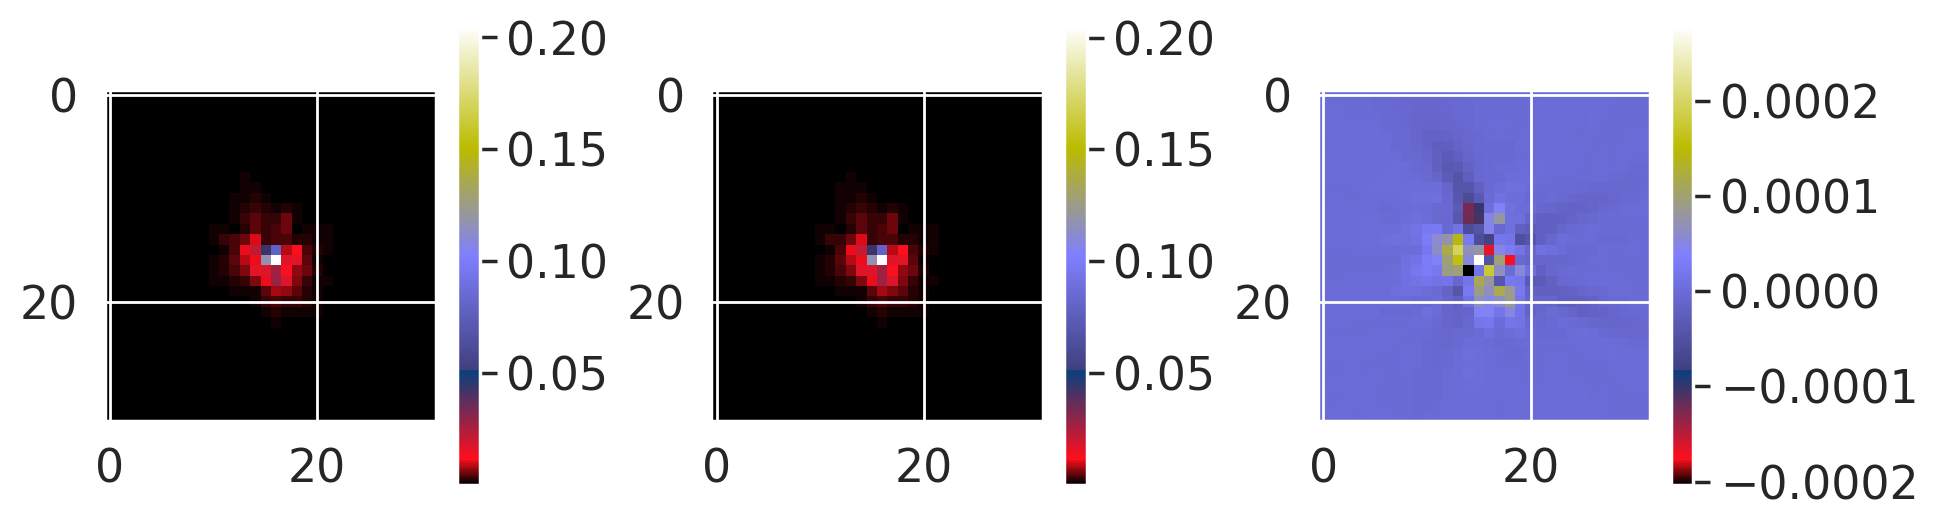

In [10]:
it = 2

plt.figure(figsize=(10,3))

plt.subplot(131)
plt.imshow(new_test_256['stars'][it,:,:], cmap='gist_stern')
plt.colorbar()

plt.subplot(132)
plt.imshow(new_test_4096['stars'][it,:,:], cmap='gist_stern')
plt.colorbar()

plt.subplot(133)
plt.imshow(new_test_256['stars'][it,:,:] - new_test_4096['stars'][it,:,:], cmap='gist_stern')
plt.colorbar()
plt.show()


In [14]:
res_stars = new_test_256['stars'] - test_256['stars']


np.mean(res_stars)


-2.2488724749601672e-21

/tmp/ipykernel_2339346/3406494861.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()
/tmp/ipykernel_2339346/3406494861.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()
/tmp/ipykernel_2339346/3406494861.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


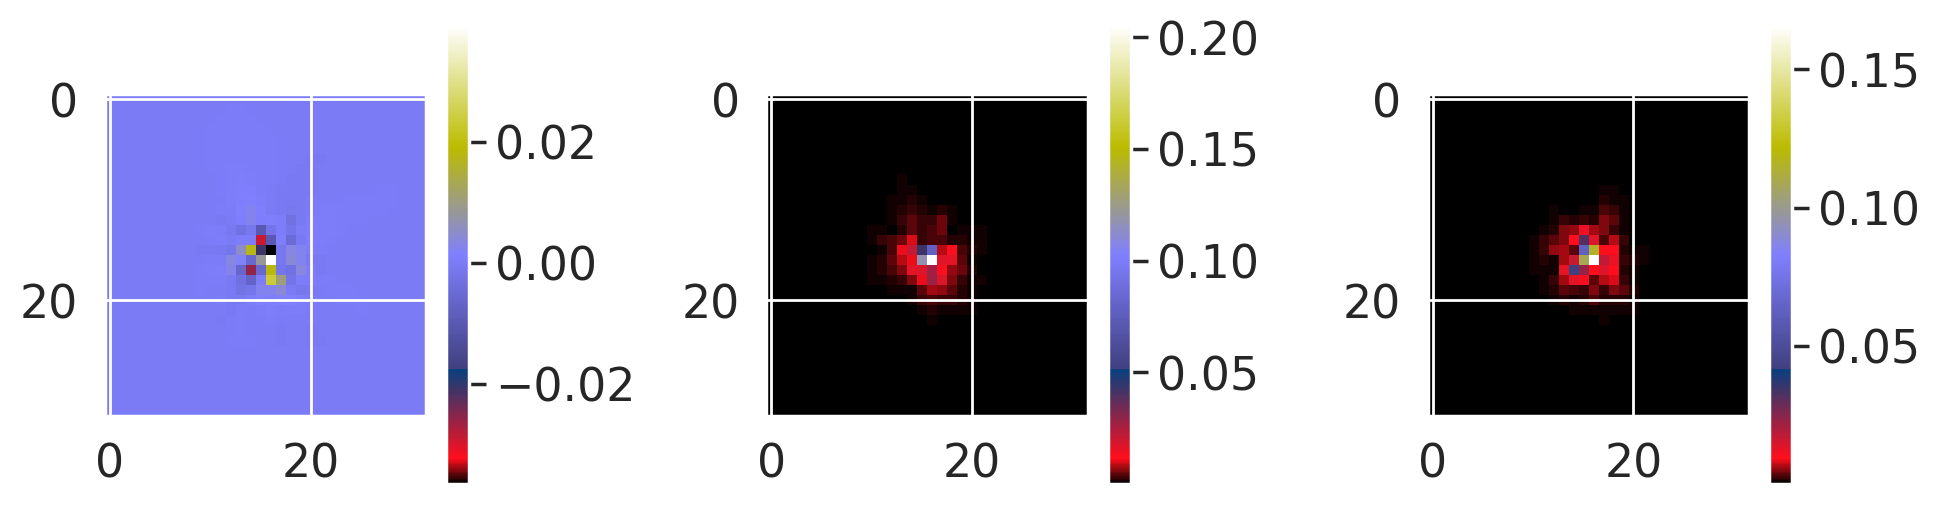

In [17]:
it = 2
plt.figure(figsize=(10,3))

plt.subplot(131)
plt.imshow(res_stars[it,:,:], cmap='gist_stern')
plt.colorbar()

plt.subplot(132)
plt.imshow(new_test_256['stars'][it,:,:], cmap='gist_stern')
plt.colorbar()

plt.subplot(133)
plt.imshow(test_256['stars'][it,:,:], cmap='gist_stern')
plt.colorbar()
plt.show()

# Regenerate x3 res test stars

In [3]:
import tensorflow as tf


In [7]:
test_4096['parameters']

{'d_max': 2,
 'max_order': 45,
 'x_lims': [0, 1000.0],
 'y_lims': [0, 1000.0],
 'grid_points': [4, 4],
 'n_bins': 20,
 'max_wfe_rms': 0.1,
 'oversampling_rate': 3.0,
 'output_Q': 3.0,
 'output_dim': 32,
 'LP_filter_length': 2,
 'pupil_diameter': 4096,
 'euclid_obsc': True,
 'n_stars': 400}

In [16]:


# test_pos = test_256['positions']
# test_SEDs = test_256['SEDs']
# test_C_poly = test_256['C_poly']
# test_parameters = test_256['parameters']

test_pos = test_4096['positions']
test_SEDs = test_4096['SEDs']
test_C_poly = test_4096['C_poly']
test_parameters = test_4096['parameters']

d_max_nonparam = 5
batch_size = 2


In [11]:
test_parameters

{'d_max': 2,
 'max_order': 45,
 'x_lims': [0, 1000.0],
 'y_lims': [0, 1000.0],
 'grid_points': [4, 4],
 'n_bins': 20,
 'max_wfe_rms': 0.1,
 'oversampling_rate': 3.0,
 'output_Q': 3.0,
 'output_dim': 32,
 'LP_filter_length': 2,
 'pupil_diameter': 4096,
 'euclid_obsc': True,
 'n_stars': 400}

In [12]:
## Prepare ground truth model
# Generate Zernike maps
zernikes = wf.utils.zernike_generator(
    n_zernikes=test_parameters['max_order'], wfe_dim=test_parameters['pupil_diameter']
)
# Now as cubes
np_zernike_cube = np.zeros((len(zernikes), zernikes[0].shape[0], zernikes[0].shape[1]))
for it in range(len(zernikes)):
    np_zernike_cube[it, :, :] = zernikes[it]

np_zernike_cube[np.isnan(np_zernike_cube)] = 0
tf_zernike_cube = tf.convert_to_tensor(np_zernike_cube, dtype=tf.float32)
    
    

2022-08-19 14:58:43.895974: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-19 14:58:44.570895: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30986 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:8a:00.0, compute capability: 7.0


In [13]:
# Prepare np input
simPSF_np = wf.SimPSFToolkit(
    zernikes,
    max_order=test_parameters['max_order'],
    pupil_diameter=test_parameters['pupil_diameter'],
    output_dim=test_parameters['output_dim'],
    oversampling_rate=test_parameters['oversampling_rate'],
    output_Q=test_parameters['output_Q']
)
simPSF_np.gen_random_Z_coeffs(max_order=test_parameters['max_order'])
z_coeffs = simPSF_np.normalize_zernikes(simPSF_np.get_z_coeffs(), simPSF_np.max_wfe_rms)
simPSF_np.set_z_coeffs(z_coeffs)
simPSF_np.generate_mono_PSF(lambda_obs=0.7, regen_sample=False)

# Obscurations
obscurations = simPSF_np.generate_pupil_obscurations(N_pix=test_parameters['pupil_diameter'], N_filter=2)
tf_obscurations = tf.convert_to_tensor(obscurations, dtype=tf.complex64)
    

In [17]:
# Initialize the model
GT_tf_semiparam_field = wf.tf_psf_field.TF_SemiParam_field(
    zernike_maps=tf_zernike_cube,
    obscurations=tf_obscurations,
    batch_size=batch_size,
    output_Q=test_parameters['output_Q'],
    d_max_nonparam=d_max_nonparam,
    output_dim=test_parameters['output_dim'],
    n_zernikes=test_parameters['max_order'],
    d_max=test_parameters['d_max'],
    x_lims=test_parameters['x_lims'],
    y_lims=test_parameters['y_lims']
)
# For the Ground truth model
GT_tf_semiparam_field.tf_poly_Z_field.assign_coeff_matrix(test_C_poly)
_ = GT_tf_semiparam_field.tf_np_poly_opd.alpha_mat.assign(
    np.zeros_like(GT_tf_semiparam_field.tf_np_poly_opd.alpha_mat)
)
        


In [18]:

output_Q=1
output_dim=64


In [19]:
GT_original_out_Q = GT_tf_semiparam_field.output_Q
GT_original_out_dim = GT_tf_semiparam_field.output_dim

# Set the required output_Q and output_dim parameters in the models
GT_tf_semiparam_field.set_output_Q(output_Q=output_Q, output_dim=output_dim)

# Need to compile the models again
GT_tf_semiparam_field = wf.tf_psf_field.build_PSF_model(GT_tf_semiparam_field)
    

In [1]:
test_SEDs.shape

NameError: name 'test_SEDs' is not defined

In [20]:
tot = 4

# Generate SED data list
packed_SED_data = [
    wf.utils.generate_packed_elems(_sed, simPSF_np, n_bins=test_parameters['n_bins']) for _sed in test_SEDs[:4,:,:]
]
    
# Prepare inputs
tf_packed_SED_data = tf.convert_to_tensor(packed_SED_data, dtype=tf.float32)
tf_packed_SED_data = tf.transpose(tf_packed_SED_data, perm=[0, 2, 1])
pred_inputs = [test_pos[:4,:], tf_packed_SED_data]


In [ ]:
%%time
# Ground Truth model
GT_predictions = GT_tf_semiparam_field.predict(x=pred_inputs, batch_size=2)


In [ ]:
GT_predictions.shape

In [50]:

np.save(saving_folder+'resx3_stars_wfe256_test_dataset.npy', GT_predictions,allow_pickle=True)


<timed exec>:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


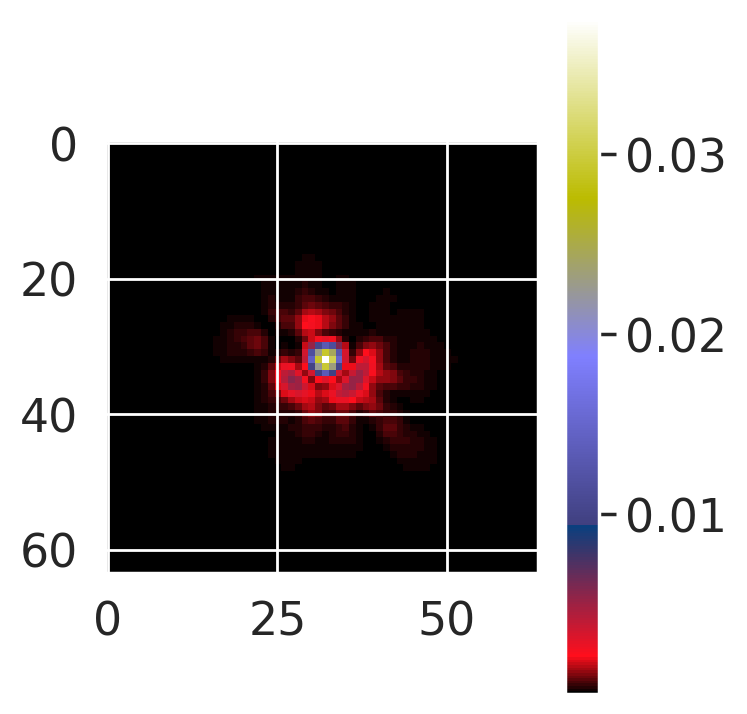

CPU times: user 377 ms, sys: 118 ms, total: 494 ms
Wall time: 217 ms


In [60]:

plt.figure(figsize=(4,4))
plt.imshow(GT_predictions[0,:,:], cmap='gist_stern')
plt.colorbar()
plt.show()
